In [118]:
########################################################################################
#House Prices - Advanced Regression Techniques WITH FEATURE ENGINEERING AND OPTIMIZATIONS
########################################################################################

#With 79 explanatory variables describing (almost) every aspect of residential homes in Ames,
# this project is to predict the final price of each home.

# LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

warnings.simplefilter (action='ignore', category=FutureWarning)
warnings.simplefilter ("ignore", category=ConvergenceWarning)

pd.set_option ('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option ('display.width', None)
pd.set_option ('display.float_format', lambda x: '%.3f' % x)

In [119]:
########################
# Loading the data
########################

In [120]:
train = pd.read_csv ("train.csv")
test = pd.read_csv ("test.csv")
df = train.append (test, ignore_index=False).reset_index ()

df = df.drop ("index", axis=1)

In [121]:
#####################################################
# EDA
#####################################################

In [122]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


In [123]:

def check_df(dataframe):
    print ("##################### Shape #####################")
    print (dataframe.shape)
    print ("##################### Types #####################")
    print (dataframe.dtypes)
    print ("##################### Head #####################")
    print (dataframe.head (3))
    print ("##################### Tail #####################")
    print (dataframe.tail (3))
    print ("##################### NA #####################")
    print (dataframe.isnull ().sum ())
    print ("##################### Quantiles #####################")
    print (dataframe.quantile ([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


check_df (df)

##################### Shape #####################
(2919, 81)
##################### Types #####################
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object
##################### Head #####################
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    In

In [124]:
m = df.select_dtypes('Int64')
df[m.columns]= m.astype('float')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   float64
 1   MSSubClass     2919 non-null   float64
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   float64
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   float64
 18  OverallC

In [126]:
####################################
# NUMERIC AND CATEGORICAL VARIABLES
####################################

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    grab_col_names for given dataframe

    :param dataframe:
    :param cat_th:
    :param car_th:
    :return:
    """

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique () < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique () > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print (f"Observations: {dataframe.shape[0]}")
    print (f"Variables: {dataframe.shape[1]}")
    print (f'cat_cols: {len (cat_cols)}')
    print (f'num_cols: {len (num_cols)}')
    print (f'cat_but_car: {len (cat_but_car)}')
    print (f'num_but_cat: {len (num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    return cat_cols, cat_but_car, num_cols


cat_cols, cat_but_car, num_cols = grab_col_names (df)

Observations: 2919
Variables: 81
cat_cols: 52
num_cols: 28
cat_but_car: 1
num_but_cat: 10


In [127]:
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [128]:
# Variable "Id" is not a numeric column. We need to remove it form out num_cols list
num_cols = [col for col in num_cols if col not in "Id"]

In [ ]:
######################################
# Analysis of Categorical Variables
######################################
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


#for col in cat_cols:
    cat_summary(df, col, plot=True)

In [ ]:
######################################
# Analysis of Numerical Variables
######################################

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print (dataframe[numerical_col].describe (quantiles).T)

    if plot:
        dataframe[numerical_col].hist (bins=50)
        plt.xlabel (numerical_col)
        plt.title (numerical_col)
        plt.show ()

    print ("#####################################")


# for col in num_cols:
    num_summary (df, col, True)
num_summary(df,num_cols)


          TARGET_MEAN
MSZoning             
C (all)     74528.000
FV         214014.062
RH         131558.375
RL         191004.995
RM         126316.830


        TARGET_MEAN
Street             
Grvl     130190.500
Pave     181130.539


       TARGET_MEAN
Alley             
Grvl    122219.080
Pave    168000.585


          TARGET_MEAN
LotShape             
IR1        206101.665
IR2        239833.366
IR3        216036.500
Reg        164754.818


             TARGET_MEAN
LandContour             
Bnk           143104.079
HLS           231533.940
Low           203661.111
Lvl           180183.747


           TARGET_MEAN
Utilities             
AllPub      180950.957
NoSeWa      137500.000


           TARGET_MEAN
LotConfig             
Corner      181623.426
CulDSac     223854.617
FR2         177934.574
FR3         208475.000
Inside      176938.048


           TARGET_MEAN
LandSlope             
Gtl         179956.800
Mod         196734.138
Sev         204379.231


            TARGET_MEAN


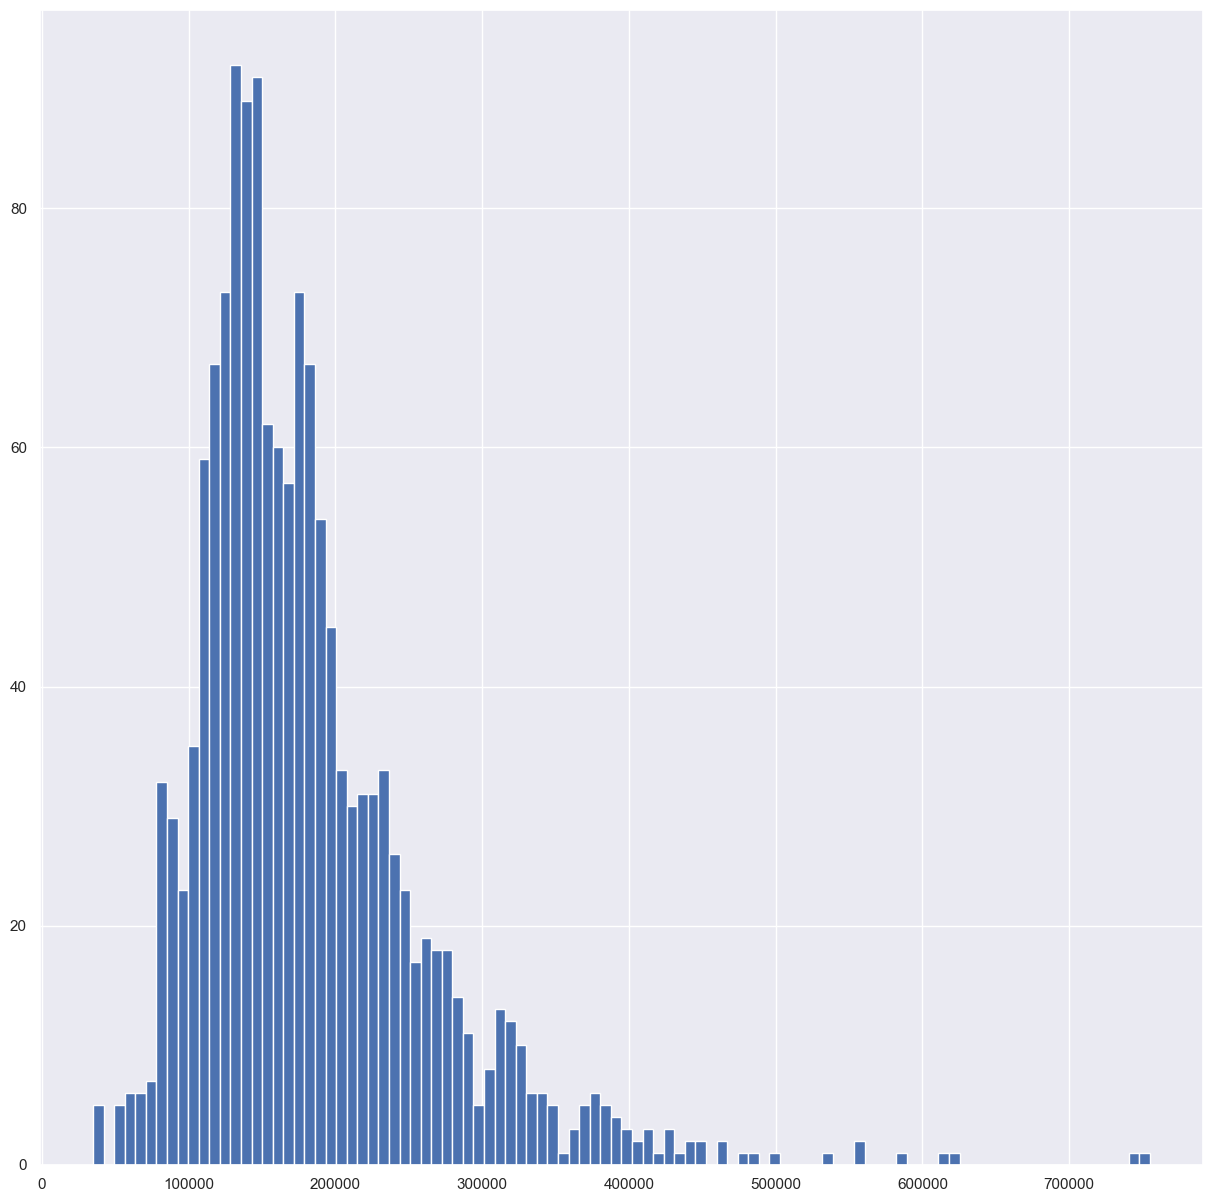

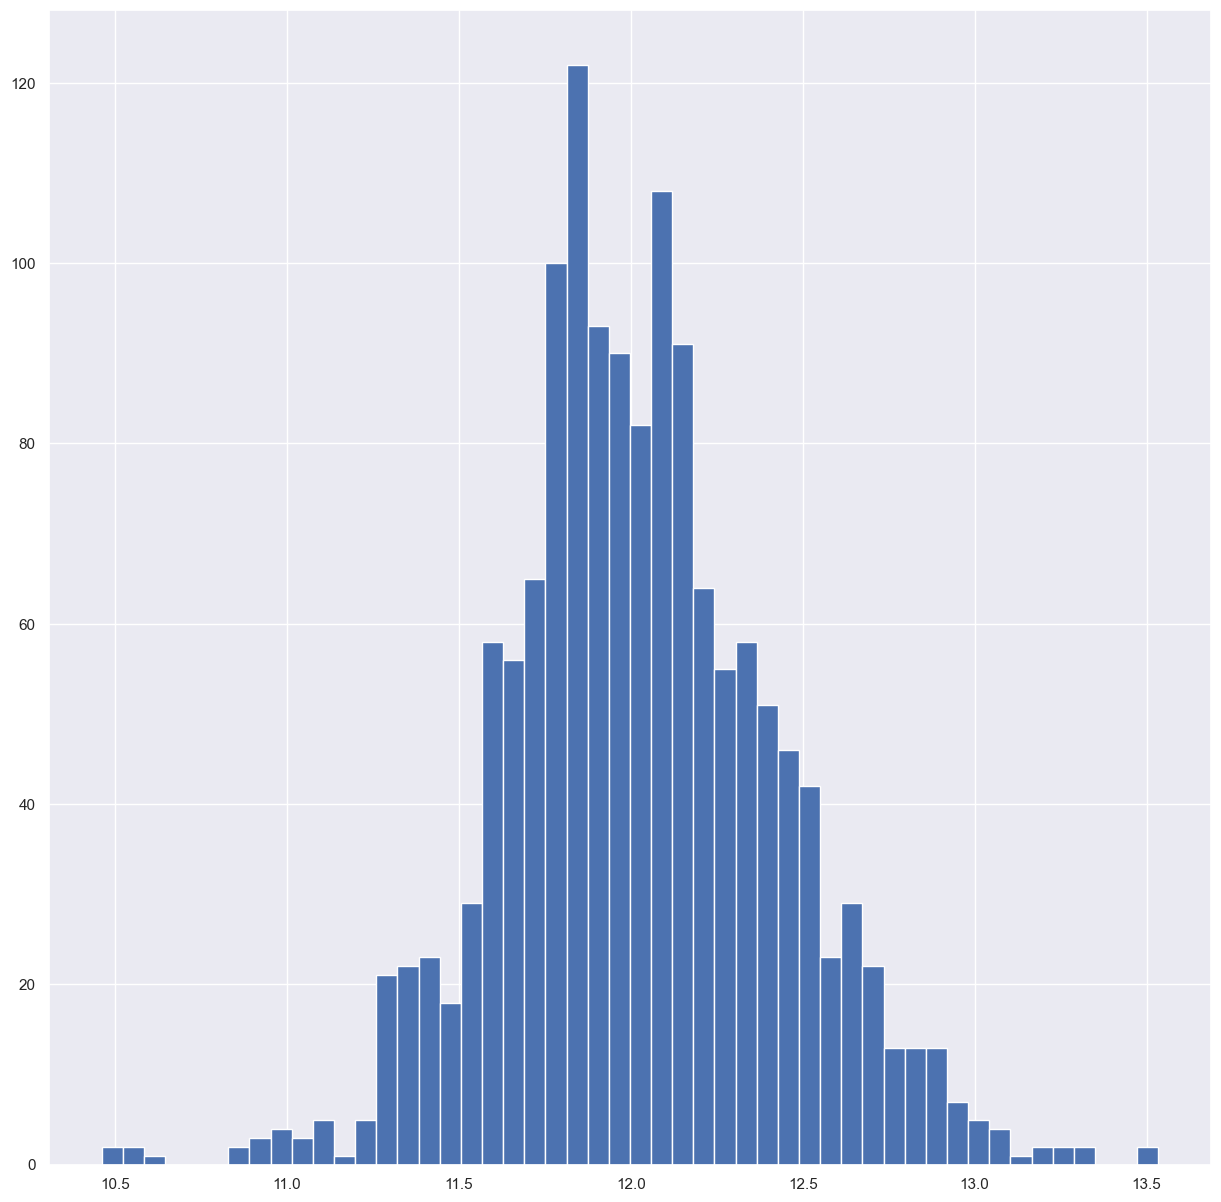

In [131]:
######################################
# Analysis of Target Variable
######################################

def target_summary_with_cat(dataframe, target, categorical_col):
    print (pd.DataFrame ({"TARGET_MEAN": dataframe.groupby (categorical_col)[target].mean ()}), end="\n\n\n")


for col in cat_cols:
    target_summary_with_cat (df, "SalePrice", col)

# Target Analysis Grap
df["SalePrice"].hist (bins=100)
plt.show ()

# Log transformation on target variable
#Log transformation of target variable help lessens the distance between the data points
# and result in the better model
np.log1p (df['SalePrice']).hist (bins=50)
plt.show ()

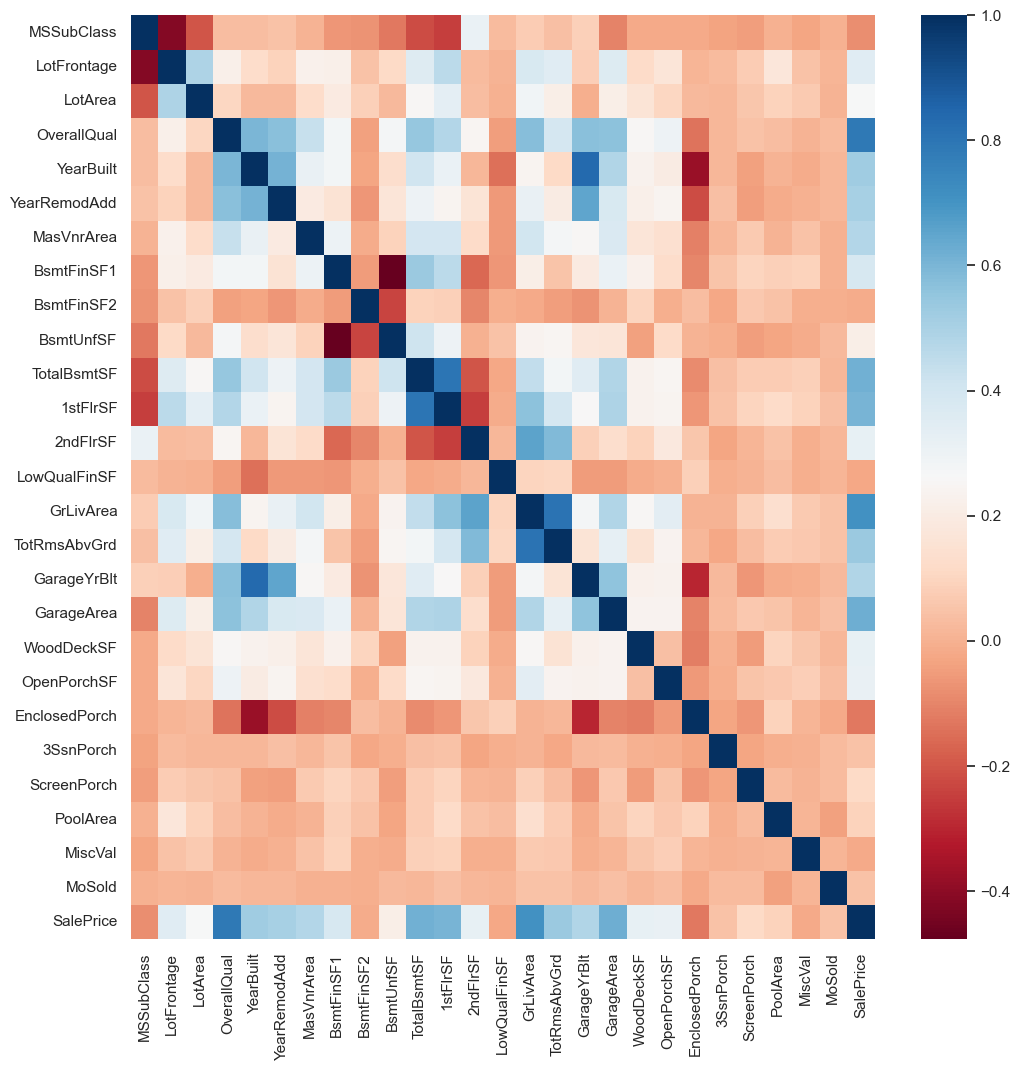

In [132]:
######################################
# Analysis of Correlation Matrix
######################################

corr = df[num_cols].corr ()
corr

# Korelasyonların gösterilmesi
sns.set (rc={'figure.figsize': (12, 12)})
sns.heatmap (corr, cmap="RdBu")
plt.show ()

C:\Users\HuseyinBurakBolat\Anaconda3\Lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


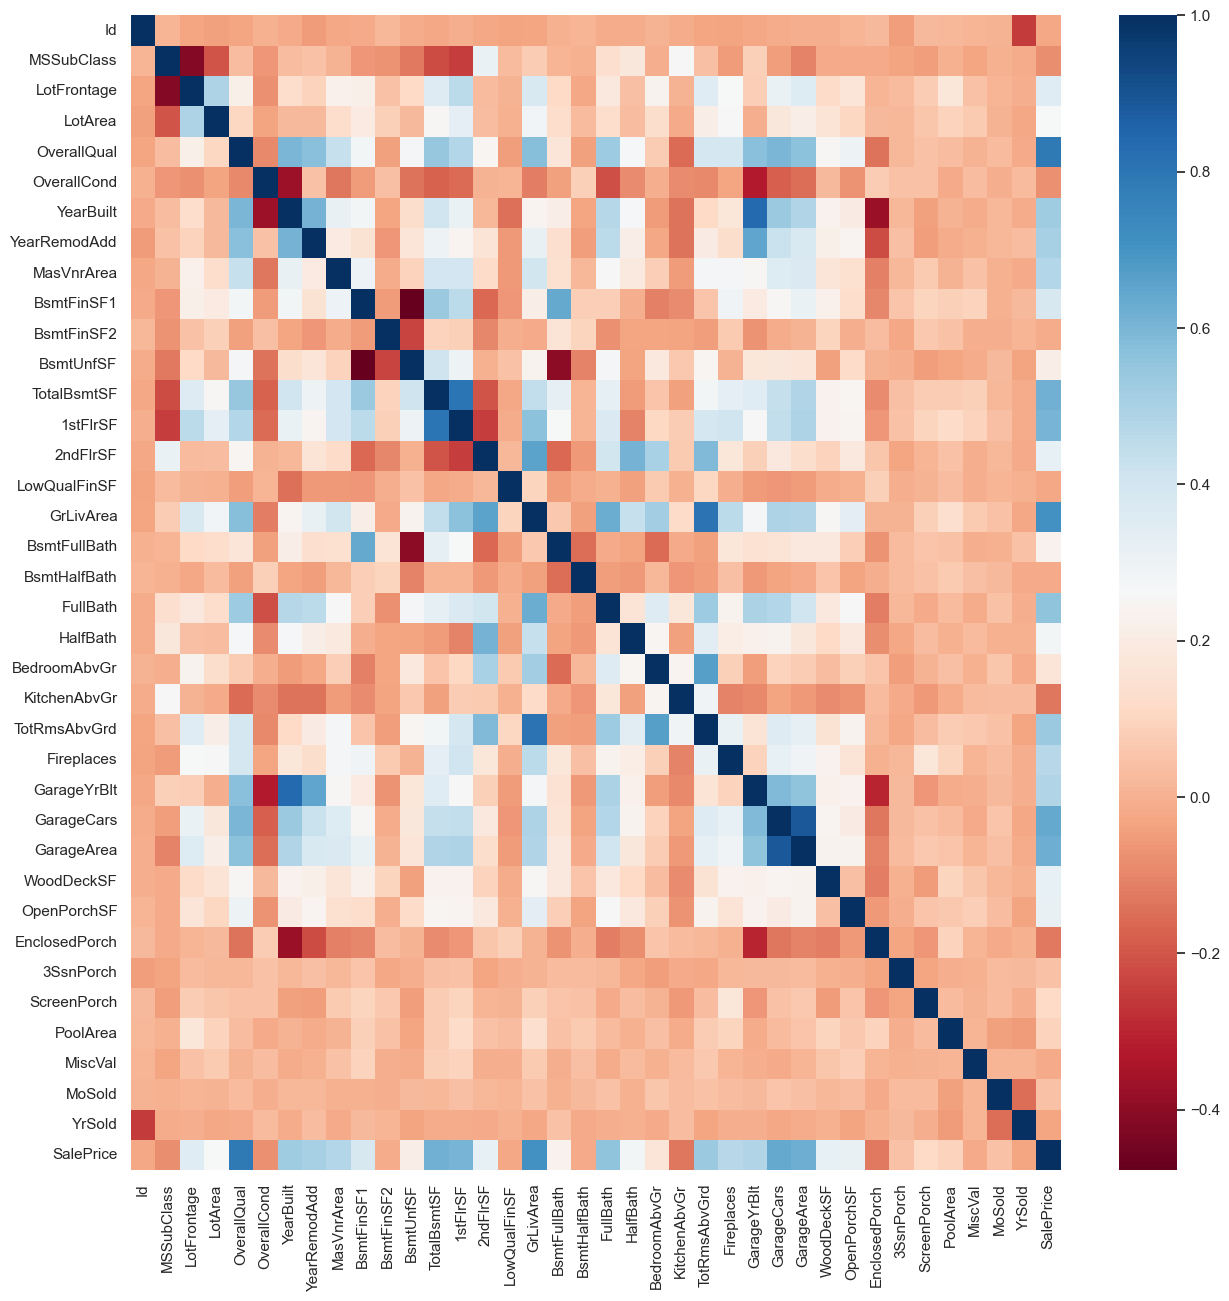

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']

In [133]:
# Analysis of Higly Correlated Variablea
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr ()
    cor_matrix = corr.abs ()
    upper_triangle_matrix = cor_matrix.where (np.triu (np.ones (cor_matrix.shape), k=1).astype (np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any (upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set (rc={'figure.figsize': (15, 15)})
        sns.heatmap (corr, cmap="RdBu")
        plt.show ()
    return drop_list


high_correlated_cols (df, plot=True)


In [134]:
######################################
# Feature Engineering
######################################

######################################
# Outlier analysis
######################################

# Outlier Detection
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile (low_quantile)
    quantile_three = dataframe[variable].quantile (up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit


# Aykırı değer kontrolü
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds (dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any (axis=None):
        return True
    else:
        return False


for col in num_cols:
    if col != "SalePrice":
        print (col, check_outlier (df, col))


# Replacing with Threshold
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds (dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

# Let's see if we have any outlier, we should not count SalePrice since it is target
for col in num_cols:
    if col != "SalePrice":
        replace_with_thresholds (df, col)

# Below is seen all outliers have been replaced with thresholds

MSSubClass False
LotFrontage True
LotArea True
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd True
GarageYrBlt True
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
PoolArea True
MiscVal True
MoSold False


In [135]:
######################################
# Missing Values
######################################


def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull ().sum () > 0]

    n_miss = dataframe[na_columns].isnull ().sum ().sort_values (ascending=False)

    ratio = (dataframe[na_columns].isnull ().sum () / dataframe.shape[0] * 100).sort_values (ascending=False)

    missing_df = pd.concat ([n_miss, np.round (ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print (missing_df, end="\n")

    if na_name:
        return na_columns
missing_values_table(df)

              n_miss  ratio
PoolQC          2909 99.660
MiscFeature     2814 96.400
Alley           2721 93.220
Fence           2348 80.440
SalePrice       1459 49.980
FireplaceQu     1420 48.650
LotFrontage      486 16.650
GarageCond       159  5.450
GarageYrBlt      159  5.450
GarageFinish     159  5.450
GarageQual       159  5.450
GarageType       157  5.380
BsmtExposure      82  2.810
BsmtCond          82  2.810
BsmtQual          81  2.770
BsmtFinType2      80  2.740
BsmtFinType1      79  2.710
MasVnrType        24  0.820
MasVnrArea        23  0.790
MSZoning           4  0.140
Functional         2  0.070
BsmtHalfBath       2  0.070
BsmtFullBath       2  0.070
Utilities          2  0.070
KitchenQual        1  0.030
TotalBsmtSF        1  0.030
BsmtUnfSF          1  0.030
GarageCars         1  0.030
GarageArea         1  0.030
BsmtFinSF2         1  0.030
BsmtFinSF1         1  0.030
Exterior2nd        1  0.030
Exterior1st        1  0.030
SaleType           1  0.030
Electrical         1

In [136]:
df["Alley"].value_counts ()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [137]:
df["BsmtQual"].value_counts ()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [138]:
# NA values in some columns indicate that those particular features doesnt exist in regarding house
no_cols = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu",
           "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

# Let's replace them as "No" String value
for col in no_cols:
    df[col].fillna ("No", inplace=True)

missing_values_table (df)

              n_miss  ratio
SalePrice       1459 49.980
LotFrontage      486 16.650
GarageYrBlt      159  5.450
MasVnrType        24  0.820
MasVnrArea        23  0.790
MSZoning           4  0.140
BsmtFullBath       2  0.070
BsmtHalfBath       2  0.070
Functional         2  0.070
Utilities          2  0.070
Exterior2nd        1  0.030
BsmtFinSF1         1  0.030
BsmtFinSF2         1  0.030
BsmtUnfSF          1  0.030
Exterior1st        1  0.030
Electrical         1  0.030
KitchenQual        1  0.030
GarageCars         1  0.030
GarageArea         1  0.030
SaleType           1  0.030
TotalBsmtSF        1  0.030


In [139]:
# This function below fills Na values with mean and media

def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if
                         data[col].isnull ().sum () > 0]  # Listing Na Values

    temp_target = data[target]

    print ("# BEFORE")
    print (data[variables_with_na].isnull ().sum (), "\n\n")  # Prints sum of Na values
    # If object variable has class numbers are less or equals to variable length, then fill Na with Mode
    data = data.apply (lambda x: x.fillna (x.mode ()[0]) if (x.dtype == "O" and len (x.unique ()) <= cat_length) else x,
                       axis=0)

    # This method below fill Na values with mean in non-object variables
    if num_method == "mean":
        data = data.apply (lambda x: x.fillna (x.mean ()) if x.dtype != "O" else x, axis=0)
    # This method below fill Na values with median in non-object variables
    elif num_method == "median":
        data = data.apply (lambda x: x.fillna (x.median ()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print ("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print (" Imputation method is '" + num_method.upper () + "' for numeric variables! \n")
    print (data[variables_with_na].isnull ().sum (), "\n\n")

    return data


df = quick_missing_imp (df, num_method="median", cat_length=17)

# BEFORE
MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SaleType           1
SalePrice       1459
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

MSZoning           0
LotFrontage        0
Utilities          0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Electrical         0
BsmtFullBath       0
BsmtHalfBath       0
KitchenQual        0
Functional         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
SaleType      

In [140]:
######################################
# Rare analysis and Rare Encoding
######################################

# Fot categoric variable

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print (col, ":", len (dataframe[col].value_counts ()))
        print (pd.DataFrame ({"COUNT": dataframe[col].value_counts (),
                              "RATIO": dataframe[col].value_counts () / len (dataframe),
                              "TARGET_MEAN": dataframe.groupby (col)[target].mean ()}), end="\n\n\n")


rare_analyser (df, "SalePrice", cat_cols)

MSZoning : 5
         COUNT  RATIO  TARGET_MEAN
C (all)     25  0.009    74528.000
FV         139  0.048   214014.062
RH          26  0.009   131558.375
RL        2269  0.777   191004.995
RM         460  0.158   126316.830


Street : 2
      COUNT  RATIO  TARGET_MEAN
Grvl     12  0.004   130190.500
Pave   2907  0.996   181130.539


Alley : 3
      COUNT  RATIO  TARGET_MEAN
Grvl    120  0.041   122219.080
No     2721  0.932   183452.131
Pave     78  0.027   168000.585


LotShape : 4
     COUNT  RATIO  TARGET_MEAN
IR1    968  0.332   206101.665
IR2     76  0.026   239833.366
IR3     16  0.005   216036.500
Reg   1859  0.637   164754.818


LandContour : 4
     COUNT  RATIO  TARGET_MEAN
Bnk    117  0.040   143104.079
HLS    120  0.041   231533.940
Low     60  0.021   203661.111
Lvl   2622  0.898   180183.747


Utilities : 2
        COUNT  RATIO  TARGET_MEAN
AllPub   2918  1.000   180950.957
NoSeWa      1  0.000   137500.000


LotConfig : 5
         COUNT  RATIO  TARGET_MEAN
Corner     511  

In [141]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy ()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts () / len (temp_df) < rare_perc).any (axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts () / len (temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where (temp_df[var].isin (rare_labels), 'Rare', temp_df[var])

    return temp_df


rare_encoder (df, 0.01)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.000,60.000,RL,65.000,8450.000,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.000,5.000,2003.000,2003.000,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856.000,854.000,0.000,1710.000,1.000,0.000,2.000,1.000,3.000,1.000,Gd,8.000,Typ,0.000,No,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0.000,61.000,0.000,0.000,0.000,0.000,No,No,No,0.000,2.000,2008.000,WD,Normal,208500.000
1,2.000,20.000,RL,80.000,9600.000,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Rare,Feedr,Norm,1Fam,1Story,6.000,8.000,1976.000,1976.000,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262.000,0.000,0.000,1262.000,0.000,1.000,2.000,0.000,3.000,1.000,TA,6.000,Typ,1.000,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298.000,0.000,0.000,0.000,0.000,0.000,No,No,No,0.000,5.000,2007.000,WD,Normal,181500.000
2,3.000,60.000,RL,68.000,11250.000,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.000,5.000,2001.000,2002.000,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920.000,866.000,0.000,1786.000,1.000,0.000,2.000,1.000,3.000,1.000,Gd,6.000,Typ,1.000,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0.000,42.000,0.000,0.000,0.000,0.000,No,No,No,0.000,9.000,2008.000,WD,Normal,223500.000
3,4.000,70.000,RL,60.000,9550.000,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.000,5.000,1915.000,1970.000,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961.000,756.000,0.000,1717.000,1.000,0.000,1.000,0.000,3.000,1.000,Gd,7.000,Typ,1.000,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0.000,35.000,272.000,0.000,0.000,0.000,No,No,No,0.000,2.000,2006.000,WD,Abnorml,140000.000
4,5.000,60.000,RL,84.000,14260.000,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.000,5.000,2000.000,2000.000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145.000,1053.000,0.000,2198.000,1.000,0.000,2.000,1.000,4.000,1.000,Gd,9.000,Typ,1.000,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192.000,84.000,0.000,0.000,0.000,0.000,No,No,No,0.000,12.000,2008.000,WD,Normal,250000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915.000,160.000,RM,21.000,1936.000,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4.000,7.000,1970.000,1970.000,Gable,CompShg,CemntBd,CmentBd,None,0.000,TA,TA,CBlock,TA,TA,No,Unf,0.000,Unf,0.000,546.000,546.000,GasA,Gd,Y,SBrkr,546.000,546.000,0.000,1092.000,0.000,0.000,1.000,1.000,3.000,1.000,TA,5.000,Typ,0.000,No,No,1979.000,No,0.000,0.000,No,No,Y,0.000,0.000,0.000,0.000,0.000,0.000,No,No,No,0.000,6.000,2006.000,WD,Normal,NaN
2915,2916.000,160.000,RM,

In [142]:
###################################################
# Creation of New Features and Tagging them as New
###################################################


df["NEW_1st*GrLiv"] = df["1stFlrSF"] * df["GrLivArea"]

df["NEW_Garage*GrLiv"] = (df["GarageArea"] * df["GrLivArea"])

df["TotalQual"] = df[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",
                      "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual",
                      "GarageCond", "Fence"]].sum (axis=1)  # 42

# Total Floor
df["NEW_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]  # 32

# Total Finished Basement Area
df["NEW_TotalBsmtFin"] = df.BsmtFinSF1 + df.BsmtFinSF2  # 56

# Porch Area
df["NEW_PorchArea"] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df["3SsnPorch"] + df.WoodDeckSF  # 93

# Total House Area
df["NEW_TotalHouseArea"] = df.NEW_TotalFlrSF + df.TotalBsmtSF  # 156

df["NEW_TotalSqFeet"] = df.GrLivArea + df.TotalBsmtSF  # 35

# Lot Ratio
df["NEW_LotRatio"] = df.GrLivArea / df.LotArea  # 64

df["NEW_RatioArea"] = df.NEW_TotalHouseArea / df.LotArea  # 57

df["NEW_GarageLotRatio"] = df.GarageArea / df.LotArea  # 69

# MasVnrArea
df["NEW_MasVnrRatio"] = df.MasVnrArea / df.NEW_TotalHouseArea  # 36

# Dif Area
df["NEW_DifArea"] = (df.LotArea - df["1stFlrSF"] - df.GarageArea - df.NEW_PorchArea - df.WoodDeckSF)  # 73

df["NEW_OverallGrade"] = df["OverallQual"] * df["OverallCond"]  # 61

df["NEW_Restoration"] = df.YearRemodAdd - df.YearBuilt  # 31

df["NEW_HouseAge"] = df.YrSold - df.YearBuilt  # 73

df["NEW_RestorationAge"] = df.YrSold - df.YearRemodAdd  # 40

df["NEW_GarageAge"] = df.GarageYrBlt - df.YearBuilt  # 17

df["NEW_GarageRestorationAge"] = np.abs (df.GarageYrBlt - df.YearRemodAdd)  # 30

df["NEW_GarageSold"] = df.YrSold - df.GarageYrBlt  # 48

drop_list = ["Street", "Alley", "LandContour", "Utilities", "LandSlope", "Heating", "PoolQC", "MiscFeature",
             "Neighborhood"]

df.drop (drop_list, axis=1, inplace=True)

In [143]:
##################
# Label Encoding & One-Hot Encoding
##################

cat_cols, cat_but_car, num_cols = grab_col_names (df)


def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder ()
    dataframe[binary_col] = labelencoder.fit_transform (dataframe[binary_col])
    return dataframe


Observations: 2919
Variables: 92
cat_cols: 49
num_cols: 43
cat_but_car: 0
num_but_cat: 15


In [144]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and len (df[col].unique ()) == 2]

for col in binary_cols:
    label_encoder (df, col)


def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies (dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


df = one_hot_encoder (df, cat_cols, drop_first=True)

In [145]:
##################################
# MODELLING
##################################
# Split Train ve Test datas. (SalePrice having null values are fort Testing.)
train_df = df[df['SalePrice'].notnull ()]
test_df = df[df['SalePrice'].isnull ()]

y = train_df['SalePrice']  # np.log1p(df['SalePrice'])
X = train_df.drop (["Id", "SalePrice"], axis=1)

# Hold out Method .
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20, random_state=17)

In [146]:
models = [('LR', LinearRegression ()),
          # ("Ridge", Ridge()),
          # ("Lasso", Lasso()),
          # ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor ()),
          ('CART', DecisionTreeRegressor ()),
          ('RF', RandomForestRegressor ()),
          # ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor ()),
          ("XGBoost", XGBRegressor (objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor ())]
# ("CatBoost", CatBoostRegressor(verbose=False))

In [147]:
for name, regressor in models:
    rmse = np.mean (np.sqrt (-cross_val_score (regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print (f"RMSE: {round (rmse, 4)} ({name}) ")

RMSE: 42501.7985 (LR) 
RMSE: 47557.3947 (KNN) 
RMSE: 40292.0985 (CART) 
RMSE: 29257.4401 (RF) 
RMSE: 25667.5973 (GBM) 
RMSE: 28622.4894 (XGBoost) 
RMSE: 28582.004 (LightGBM) 


In [148]:
df['SalePrice'].mean ()

180921.19589041095

In [149]:
df['SalePrice'].std ()

79442.50288288663

In [150]:
#######################################
# Log transformation of target variable
#######################################

In [151]:
train_df = df[df['SalePrice'].notnull ()]
test_df = df[df['SalePrice'].isnull ()]

y = np.log1p (train_df['SalePrice'])
X = train_df.drop (["Id", "SalePrice"], axis=1)


X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20, random_state=17)

# lgbm_tuned = LGBMRegressor(**lgbm_gs_best.best_params_).fit(X_train, y_train)

lgbm = LGBMRegressor ().fit (X_train, y_train)
y_pred = lgbm.predict (X_test)

y_pred
#  LOG inverse
new_y = np.expm1 (y_pred)
new_y
new_y_test = np.expm1 (y_test)
new_y_test

np.sqrt (mean_squared_error (new_y_test, new_y))

23883.703236834575

In [152]:
#############################
# Hyperparameter Optimization
#############################


lgbm_model = LGBMRegressor (random_state=46)

rmse = np.mean (np.sqrt (-cross_val_score (lgbm_model, X, y, cv=5, scoring="neg_mean_squared_error")))

lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1500]
               # "colsample_bytree": [0.5, 0.7, 1]
               }

lgbm_gs_best = GridSearchCV (lgbm_model,
                             lgbm_params,
                             cv=3,
                             n_jobs=-1,
                             verbose=True).fit (X, y)

final_model = lgbm_model.set_params (**lgbm_gs_best.best_params_).fit (X, y)

rmse = np.mean (np.sqrt (-cross_val_score (final_model, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

Fitting 3 folds for each of 4 candidates, totalling 12 fits


0.13387079609698854

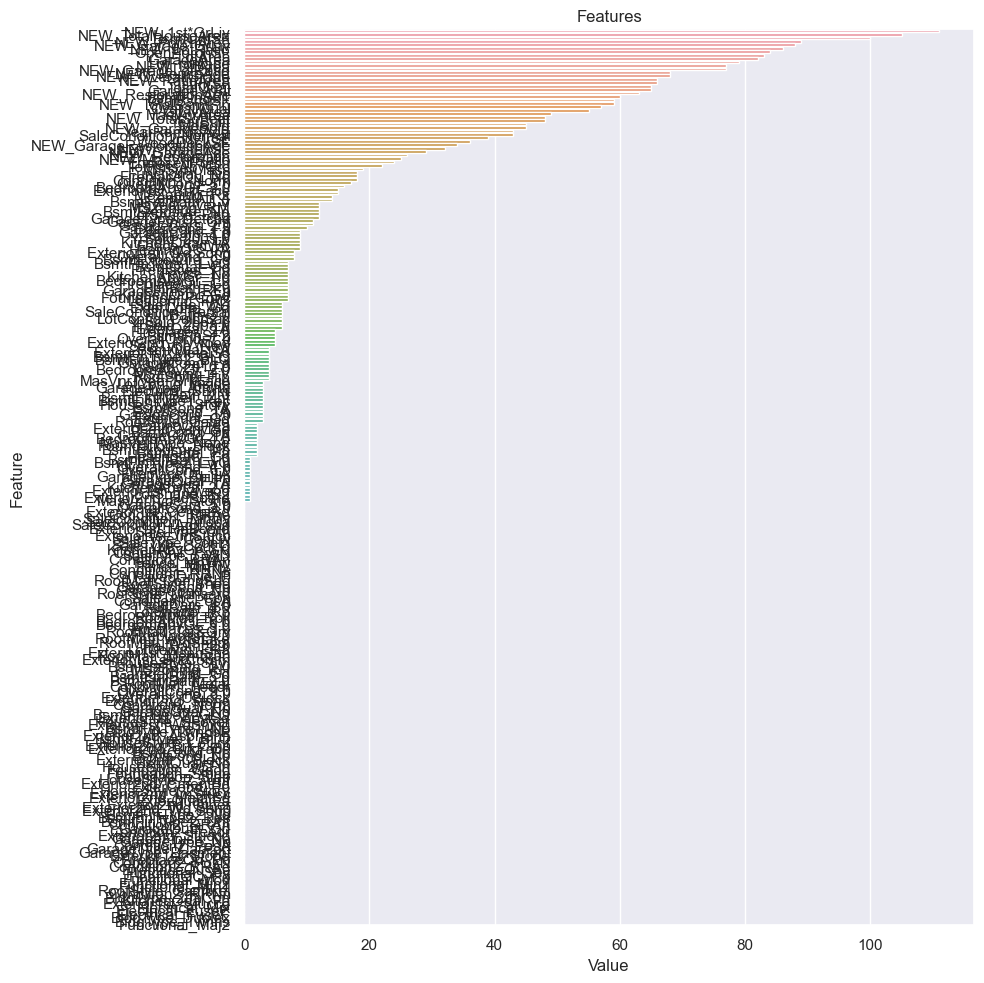

In [153]:
################################################################
# Feature Importance
################################################################

# feature importance
def plot_importance(model, features, num=len (X), save=False):
    feature_imp = pd.DataFrame ({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure (figsize=(10, 10))
    sns.set (font_scale=1)
    sns.barplot (x="Value", y="Feature", data=feature_imp.sort_values (by="Value", ascending=False)[0:num])
    plt.title ("Features")
    plt.tight_layout ()
    plt.show ()
    if save:
        plt.savefig ("importances.png")


model = LGBMRegressor ()
model.fit (X, y)

plot_importance (model, X)

In [154]:
# THERE IS A NEED TO ELIMINATE ZERO IMPORTANCE FEATURES
ser = pd.DataFrame( lgbm_model.feature_importances_, index = lgbm_model.feature_name_)
zerocolumns= ser[ser[0]>0].index.tolist()
len(zerocolumns)

139

In [155]:
imp_feats = [col for col in cols if col not in zerocolumns]
len(imp_feats)

123

In [160]:
#############################
# Final Model
#############################

########################################
# Predict the empty SalePrice values for test data
# Create a suitable dataset for submission (Id, SalePrice)
########################################

model = LGBMRegressor ()
model.fit (X, y)
predictions = model.predict (test_df.drop (["Id", "SalePrice"], axis=1))

########################
# Submission File
########################
#Inverse Log Calculator Calculation
predictions = np.expm1(predictions)
dictionary = {"Id": test_df.index, "SalePrice": predictions}
#Inverse Log Calculator Calculation

dfSubmission = pd.DataFrame (dictionary)
#dfSubmission.to_csv ("housePricePredictions.csv", index=False)